# Подбор параметров

## Кросс-валидация

 ## Оценка параметров модели
 Нам нужно как-то оценивать качество создаваемых нами моделей. Идея тренировать и тестировать модели на одних и тех же данных - плохая (модели будут переобучаться).

Решение этой проблемы номер 1:

* Разделять данные на 2 группы: для обучения и тестирования

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# Практика. Сделайте 20 разных train_test_split и обучите на них KNN-классификатор. Оцените качество на тестовой выборке

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=5)
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.9666666666666667
0.9666666666666667
1.0
0.9
0.9666666666666667
0.9666666666666667
0.9333333333333333
1.0
0.9333333333333333
0.9666666666666667
0.9666666666666667
0.9
1.0
0.9666666666666667
1.0
0.9666666666666667
1.0
0.9333333333333333
0.9666666666666667
1.0


## Конец практики

**Проблема** - качество модели имеет высокую дисперсию (high variance), т.к. примеры и в тестовой и в обучающей выборке могут значимо повлиять на полученную оценку

Решение - разобъем нашу выборку на несколько групп. Одну используем для теста, на остальных обучаем. После чего меняем группу для теста и повторяем. Усредняем полученное качество на каждой из выборок для оценки итогового качества модели

<img src="cross_validation_diagram.png" />

## Практика. Сделайте cross_val_score для KNN

In [14]:
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier(n_neighbors=5)
score=cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(score)
print(score.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


## Конец практики

# Подбор оптимального количестов соседей через CrossValidationScore

## Практика. Подберите оптимальное количество соседей на основе cross_val_score

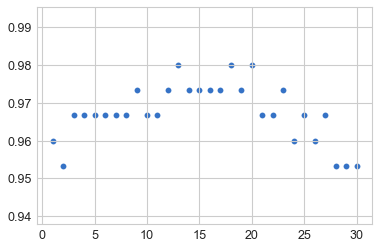

In [18]:
neib=range(1,31)
scores=[]
for n in neib:
    model = KNeighborsClassifier(n_neighbors=n)
    score=cross_val_score(model, X, y, cv=10, scoring='accuracy')
    scores.append(score.mean())
plt.scatter(neib,scores)

## Конец практики

## GridSearchCV
В некоторым смысле - эта функция более продвинутая версия цикла for, описанного выше

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [21]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [28]:
# instantiate the grid
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',n_jobs=11)

Полученный объект будет перебирать параметр "количество соседей" у KNN, делать кросс-валидацию и оценивать качество, используя accuracy в качестве метрики.
n_jobs=-1 заставляет параллелить вычисления по всем ядрам вашего компьютера

In [29]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=11,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [30]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.0008966922760009766
std_fit_time : 0.00029890041955004136
mean_score_time : 0.0015961170196533204
std_score_time : 0.0004885884572120313
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : 1.0
split1_test_score : 0.9333333333333333
split2_test_score : 1.0
split3_test_score : 0.9333333333333333
split4_test_score : 0.8666666666666667
split5_test_score : 1.0
split6_test_score : 0.8666666666666667
split7_test_score : 1.0
split8_test_score : 1.0
split9_test_score : 1.0
mean_test_score : 0.96
std_test_score : 0.053333333333333316
rank_test_score : 24
split0_train_score : 1.0
split1_train_score : 1.0
split2_train_score : 1.0
split3_train_score : 1.0
split4_train_score : 1.0
split5_train_score : 1.0
split6_train_score : 1.0
split7_train_score : 1.0
split8_train_score : 1.0
split9_train_score : 1.0
mean_train_score : 1.0
std_train_score : 0.0


C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\utils\de

In [31]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

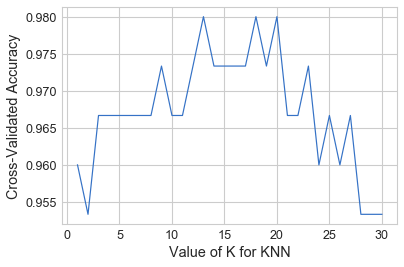

In [32]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [33]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


## Практика. Постройте confusion_matrix для лучшего estimator'а

In [34]:
from sklearn.metrics import confusion_matrix

In [36]:
y_pred = grid.best_estimator_.predict(X_test)

In [37]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  9]], dtype=int64)

## Конец практики

## Перебор нескольких параметров одновременно

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно

In [43]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range,weights=['uniform','distance'])

In [48]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',n_jobs=11)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=11,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [49]:
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


## Конец практики

## RandomizedSearch
GridSearch просто перебирает все параметры. Он, конечно, найдет их самое оптимальное значение, но вопрос во времени. Итоговое количество комбинаций для GridSearchCV - $N_1*N_2*N_3 * ... * N_K$, где $N_i$ - количество возможных значений $i$-го параметра

RandomizedSearchCV - выбирает случайные значения из параметров и пробует запускать обучение с ними. Можно попробовать "пристреляться" к оптимальным значениям, а затем запустить GridSearch для уточнения

In [52]:
from sklearn.model_selection import RandomizedSearchCV

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно при помощи RandomizedSearchCV

In [53]:
param_grid = dict(n_neighbors=list(range(1, 31)),weights=['uniform','distance'])

In [60]:
knn = KNeighborsClassifier()
grid = RandomizedSearchCV(knn, param_grid, n_iter=10, cv=10, scoring='accuracy',n_jobs=11)
grid.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=11,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [61]:
print(grid.best_score_)
print(grid.best_params_)

0.9733333333333334
{'weights': 'distance', 'n_neighbors': 23}


## Конец практики

## OOB Score

Напомним идею беггинга - выборка с повторением элементов из обучающего множества и обучение на этой выборке.
OOB-оценка - это оценка, когда для каждого $x_i$, используются только те классификаторы, которые до этого не видели $x_i$ в качестве обучающего примера

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
classifier = RandomForestClassifier(oob_score=True, n_estimators=20, max_depth=5)

In [73]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [74]:
print(classifier.oob_score_)
print(classifier.score(X_test,y_test))

0.9416666666666667
0.9666666666666667


OOB-score позволяет не делать отдельный validation dataset, но обычно приводит к недооценке реального качества

# Практическая часть

In [75]:
from sklearn.datasets import load_digits

In [76]:
data = load_digits()

In [77]:
X, y = data['data'], data['target']

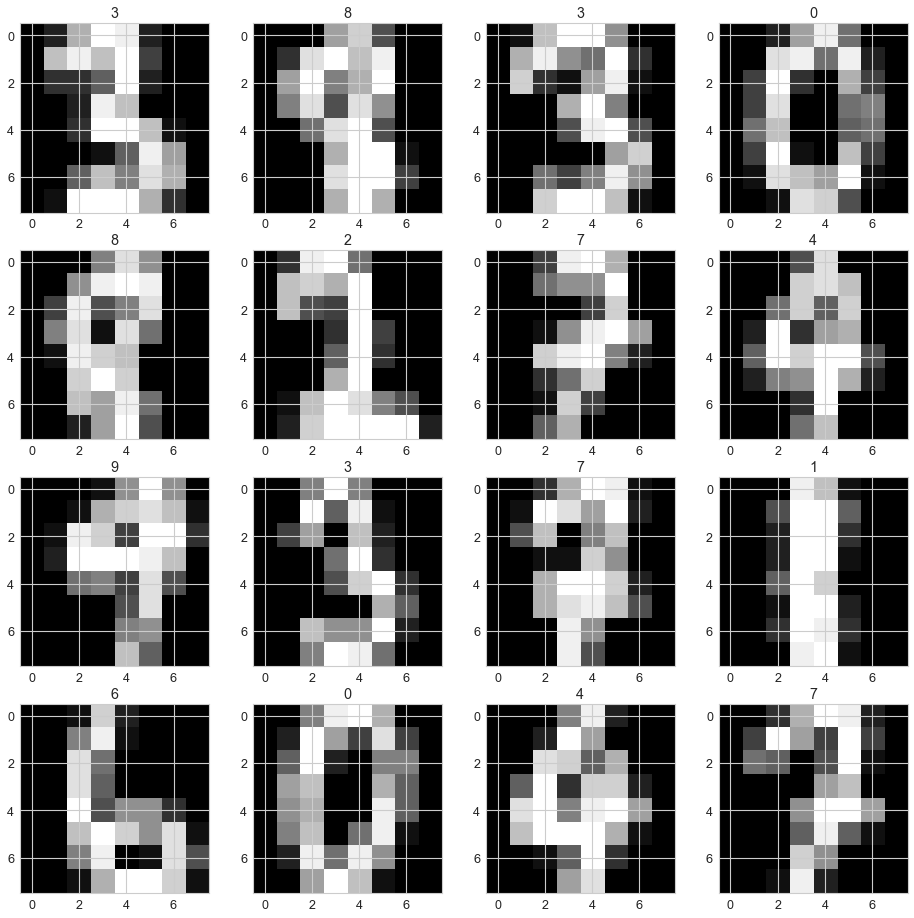

In [78]:
fig = plt.figure(figsize=(16,16))
for i in range(0, 4):
    for j in range(0,4):
        img = np.random.choice(len(X))
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(X[img].reshape(8, 8), cmap='gray')
        plt.title(y[img])
plt.show()


In [79]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

# Практика. Возьмите 5 любых классификатор, подберите для них параметры и сравните итоговое качество на отложенной выборке

In [86]:
knn_param_grid = dict(n_neighbors=list(range(1, 31)),weights=['uniform','distance'])
knn = KNeighborsClassifier()
knn_grid = RandomizedSearchCV(knn, knn_param_grid, n_iter=20, cv=10, scoring='accuracy',n_jobs=11)
knn_grid.fit(X, y)
print(knn_grid.best_score_)
print(knn_grid.best_params_)

0.9788536449638287
{'weights': 'distance', 'n_neighbors': 4}


In [87]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree_param_grid = dict(min_samples_split=list(range(2, 11)),max_features=list(range(1, 21)),criterion=['gini', 'entropy'])
tree_grid = RandomizedSearchCV(tree, tree_param_grid, n_iter=20, cv=10, scoring='accuracy',n_jobs=11)
tree_grid.fit(X, y)
print(tree_grid.best_score_)
print(tree_grid.best_params_)

0.8091263216471898
{'min_samples_split': 7, 'max_features': 15, 'criterion': 'entropy'}


C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Конец практики

# Домашняя работа
Взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество)

In [105]:
from sklearn.datasets import load_boston
boston = load_boston()
X=boston.data
y=boston.target

In [129]:
# Алгоритм ближайшего соседа
from sklearn.neighbors import KNeighborsRegressor
knn_param_grid = dict(n_neighbors=list(range(20, 101)),
                      weights=['uniform','distance'],
                      algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])
knn = KNeighborsRegressor()
knn_grid = RandomizedSearchCV(knn, knn_param_grid, n_iter=100, cv=10, scoring='neg_mean_squared_error',n_jobs=11)
knn_grid.fit(X, y)
print(knn_grid.best_score_)
print(knn_grid.best_params_)

-74.30695524017312
{'weights': 'uniform', 'n_neighbors': 91, 'algorithm': 'kd_tree'}


C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [136]:
# Алгоритм ансамбля деревьев решений
from sklearn.ensemble import GradientBoostingRegressor
ensemble_param_grid = dict(loss = ['ls', 'lad', 'huber', 'quantile'],
                           learning_rate = list(np.arange(0.01, 0.32,0.02).round(2)),
                           subsample = list(np.arange(0.1, 1,0.1).round(2)))
ensemble = GradientBoostingRegressor()
ensemble_grid = RandomizedSearchCV(ensemble, ensemble_param_grid, n_iter=100, cv=10, scoring='neg_mean_squared_error',n_jobs=11)
ensemble_grid.fit(X, y)
print(ensemble_grid.best_score_)
print(ensemble_grid.best_params_)

-16.73992244761039
{'subsample': 0.4, 'loss': 'ls', 'learning_rate': 0.13}


C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [184]:
# Алгоритм градиентного спуска
from sklearn.linear_model import SGDRegressor
SGD_param_grid = dict(loss = ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                           penalty  = ['l1','l2'],
                           alpha = list(np.log10(np.arange(1.000001, 1.010001,0.0001)).round(7)))
SGD = SGDRegressor()
SGD_grid = RandomizedSearchCV(SGD, SGD_param_grid, n_iter=100, cv=10, scoring='neg_mean_squared_error',n_jobs=11)
SGD_grid.fit(X, y)
print(SGD_grid.best_score_)
print(SGD_grid.best_params_)

-483.87582076469494
{'penalty': 'l1', 'loss': 'huber', 'alpha': 0.0031593}


C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [187]:
# Алгоритм регрессии Lasso
from sklearn.linear_model import Lasso
lasso_param_grid = dict(fit_intercept = [False, True],
                        normalize = [False, True],
                        precompute = [False, True],
                        warm_start = [False, True],
                        alpha = list(np.arange(0.001, 1.001,0.001).round(3)))
lasso = Lasso()
lasso_grid = RandomizedSearchCV(lasso, lasso_param_grid, n_iter=100, cv=10, scoring='neg_mean_squared_error',n_jobs=11)
lasso_grid.fit(X, y)
print(lasso_grid.best_score_)
print(lasso_grid.best_params_)

-32.27772524162781
{'warm_start': True, 'precompute': True, 'normalize': False, 'fit_intercept': False, 'alpha': 0.087}


C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [191]:
# Алгоритм полиномиальной регрессии
from sklearn.linear_model import LinearRegression
lr_param_grid = dict(fit_intercept = [False, True],
                     normalize = [False, True],
                     copy_X  = [False, True])
lr = LinearRegression()
lr_grid = RandomizedSearchCV(lr, lr_param_grid, n_iter=100, cv=10, scoring='neg_mean_squared_error',n_jobs=11)
lr_grid.fit(X, y)
print(lr_grid.best_score_)
print(lr_grid.best_params_)

C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


-33.409577629002364
{'normalize': False, 'fit_intercept': False, 'copy_X': False}


C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [204]:
# И еще рассмотрим в качестве дополнительного полиномиальную линейную регрессию
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pip = Pipeline([('poly', PolynomialFeatures()),('linear', LinearRegression())])
pip_param_grid = dict(poly__degree= range(1,6), poly__interaction_only= [False, True],
                      poly__include_bias= [False, True],
                      linear__fit_intercept= [False, True], linear__normalize= [False, True],
                      linear__copy_X= [False, True])
pip_grid = RandomizedSearchCV(pip, pip_param_grid, n_iter=100, cv=10, scoring='neg_mean_squared_error',n_jobs=11)
pip_grid.fit(X, y)

print(pip_grid.best_score_)
print(pip_grid.best_params_)

-33.409577629002364
{'poly__interaction_only': True, 'poly__include_bias': False, 'poly__degree': 1, 'linear__normalize': False, 'linear__fit_intercept': False, 'linear__copy_X': False}


C:\Users\Volk\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
Лучший результат показал ансамбль из деревьев решений.